In [11]:
import qiskit

## Using Grover search for boolean satisfiability

1. [Grover search](#*Groversearch)<br/>
    1.1 [Grover algorithm](#ibmq-device-IBMQ5Yorktown)<br/>
    1.2 [Quantum Oracle function](#ibmq-device-IBMQ16Melbourne)<br/>
    1.3 [Grover Operator](#ibmq-device-IBMQ16Rueschlikon)<br>
        
2. [Boolean Satisfiability](#svsimulator)<br/>
3. [Throwing a party while avoiding the drama](#usimulator)<br/>

           
### *Grover search*<a id='### *Grover search*'></a>
From source https://arxiv.org/abs/1804.03719

Grover's algorithm can be used to 
- Solve decision problems (Is the formula true ? ) $(Satisfiability)$
- Find "$with$ $a$ $good$ $probability$" a specific $item$ within a randomly ordered database of $N$ items using $O(√N)$ operations. Quadratic speedup over classical algorithm.
- For a classical computer, this takes linear $O(N)$ time, because to prove that it doesn’t you have to look at all $N$ values, and if it does once then on average you need to look at $N/2$ values to find it. So the fact that the list is unsorted and unstructured is important.
    - Note that if the list is sorted it would only take $O(log(n))$ time, 
    - And if the values were in a hash table only constant $O(1)$


Grover’s algorithm allows you to tell whether a particular value exists in $O(√N)$ steps. 

 in Grover's search, you might normally define the action of the oracle as
$U|x⟩|y⟩=|x⟩|y⊕f(x)⟩$,
where $f(x)$ returns $1$ if $x$ is the marked item. However, we always use this in a particular way, inputting  $ \frac{{|\color{red}0> -  |\color{red}1>}}{\sqrt{2}}$ on the oracle qubit. This has the net effect of just implementing a phase on the marked item. In other words, it is entirely equivalent to the implementation of a new unitary
$U~|x⟩=(−1)f(x)|x⟩$


The Grover algorithm is made of a $state$ $preparation$, a $quantum$ $Oracle$ and a $grover$ $Operator$.

 - Begin with uniform superposed state (i.e. Hadamard gate applied to |00000>). All possible $x$ values have the same amplitudes
 - Apply the Oracle (flip amplitude of state that matches search criterion). The query with ​U​f​ , a unitary transformation that flips the amplitude of the marked item: $​U​f​ |​x​⟩ = (-1)​f​(​x​)​ |​x​⟩$.
 - Reverse the sign of all states except |0> which represents the mean (DC component of the QFT). Next we apply a unitary matrix $​D​$, the so-called $“Grover$ $diffusion$ $operator”$ which has the effect of flipping all $​N​$ amplitudes about the mean amplitude.
 - Goto step 2

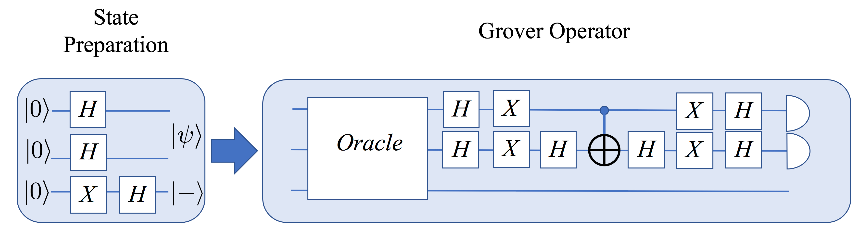

### *Quantum Oracle*
Grover's algorithm requires a "quantum oracle" operator $Uω$, which can recognize solutions to the search problem and give them a negative sign. The oracle contains a function $f$ that returns $f(x)=1$ if $|x⟩$ is a solution to the search problem and $f(x)$ $=$ $0$ otherwise. 

### The action of the oracle can then be represented as $U$$|x⟩$$|y⟩$ =$|x⟩$$|y$$⊕f(x)⟩$ where f(x) returns 1 if x is the marked item


- Implementing the Quantum Oracle can be reduced to constructing a quantum circuit that flips an ancillary qubit $q$ (called the oracle qubit) if the function, $f(x)$, evaluates to $1$ for an input $x$. The function $f(x)$ is defined by

$$ f(x)\ = \ 1 ,  \ \  if  \ x \ = \ x^*  \ \  \ \rightarrow  \ \  so \ x \ IS \ the \ solution \ to \ the \ search \ problem $$
$$ f(x)\ = \ 0 ,  \ \  if  \ x \ \neq \ x^* \ \  \ \rightarrow  \ \  so \ x \ IS \ NOT \ the \ solution \ to \ the \ search \ problem $$

$ x^* $ being the item sought 

For any $|x⟩$ with $f(x)$ $=$ $0$, its amplitude does not change. Otherwise, the amplitude is changed to $negative$. This means that the Oracle negates the probability amplitude of the input state $∣x⟩$ if and only if $f(x)=1$.

#### *Quantum Oracle example 3 qubits*



We apply the Hadamard transform to all qubits ($3$ $qubits$ --> $N$ = $2^n$ = $8$) to obtain equal amplitudes associated with each state of $\frac{1}{\sqrt{N}}$ = $\frac{1}{\sqrt{8}}$ = $\frac{1}{2\sqrt{2}}$, and thus also equal probability of being in any of the $8$ possible states






In the example below, $f(011)$ = $1$ after applying the $Oracle$ $function$, The oracle query will negate the amplitude of the state (in this case $|011>$), giving the geometric representation  :


This is the $Phase$ $shift$ $Operator$ 

###  *The Grover Operator or diffusion transform operator*
Due to the amplitude changed to negative for the searched $item$, (by applying the Oracle function) the average amplitude decreased. The Grover Operator wiil then flip every amplitude around the average, thus increasing the amplitude of the searched $item$ and lowering the others. 
 This diffusion transform consists of another application of the Hadamard transform $H⊗n$, followed by a conditional phase shift that shifts every state except $|0$ $by−1$, followed by yet another $Hadamard$ $transform$.  The conditional phase shift can be represented by the unitary operator $2 |0><0| - I$
 
 - This operator applied to state $|0> $does nothing: $(2|0〉$ $〈0|−I)$ $|0〉$ = $ 2$ $|0〉$ $〈0|0〉$ −$I|0〉$=$|0〉$
 - This operator applied to state $|x>$  $(2|0〉$ $〈0|−I)$ $|x〉$ = $ 2$ $|0〉$ $〈0|x〉$ −$I|x〉 $ = $−|x〉$
 
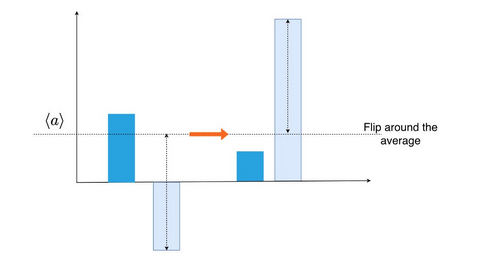


This leads to the following superposition state: 


So we repeat this process square root times (${\sqrt{N}}$) to amplify the amplitude of the right answer.

## Graphical representation of Grover 
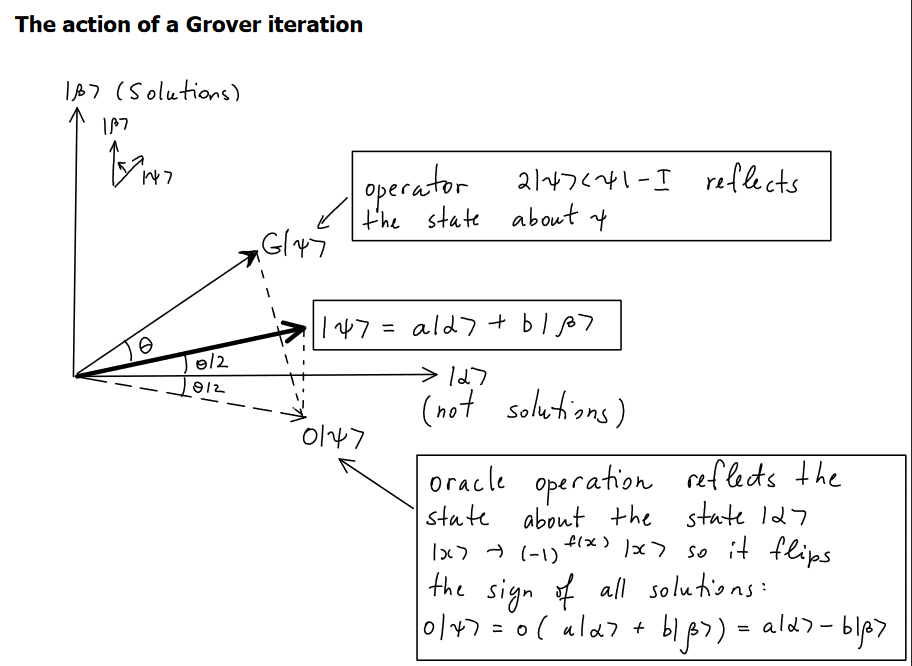

#### Example with 2 Qubits



### Example Grover with 2 qubits 
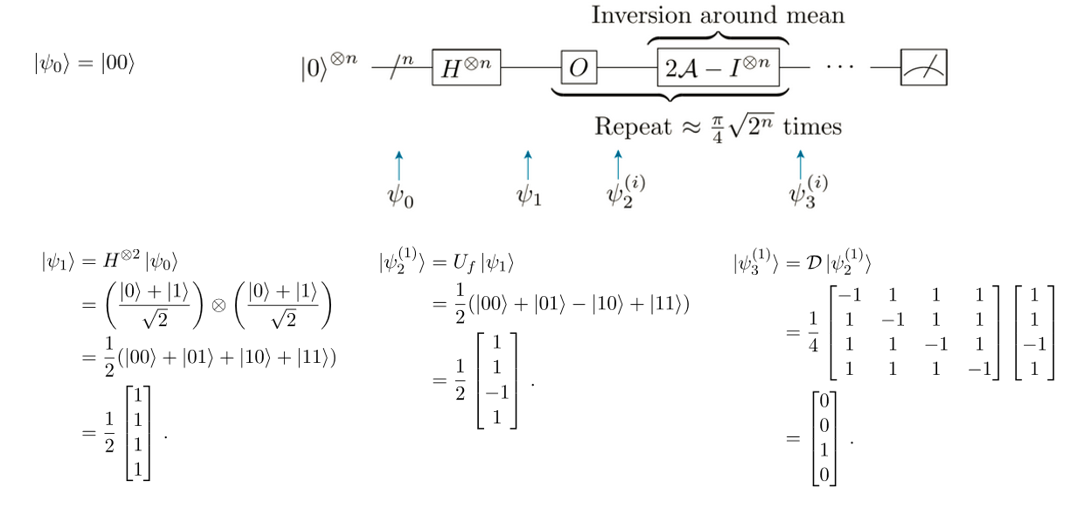

### *Boolean Satisfiability - Abbreviated "SATISFIABILITY or SAT"*


What's SAT in general. SAT is satisfiability problem. 
You have Boolean expression written using only $AND$, $OR$, $NOT$, $variables$, and $parentheses$. 
- The SAT problem is: 
 - Given the expression, is there some assignment of $TRUE$ and $FALSE$ values to the variables that will make the entire expression $true$? 
 - For example the boolean expression $x1∧x2∨x3$ is there such values of $x1$, $x2$, $x3$, that given Boolean expression is TRUE ? 
      - The answer to SAT problem is only YES or NO



#### *Satisfiable or not satisfiable ?*

The variables of a given Boolean formula can be consistently replaced by the values $TRUE$ or $FALSE$ in such a way that the formula evaluates to $TRUE$. 
- If this is the case, the formula is called $satisfiable$.
- On the other hand, if no such assignment exists, the function expressed by the formula is $FALSE$ for all possible variable assignments and the formula is $unsatisfiable$. 
- For example, the formula $($$a$ $AND$ $NOT$ $b$$)$ is $satisfiable$ because one can find the values $a$ = $TRUE$ and $b$ = $FALSE$, which make $(a$ $AND$ $NOT$ $b)$ = $TRUE$. In contrast, $(a$ $AND$ $NOT$ $a)$ is $unsatisfiable$. 

- #### *Question : Are those formulas satisfiable or not ?*
    
 - 1) $( p ∧ q ) ∨ ¬ p$

 - 2) $( p ∧ ¬ p )$

    $1$ is satisfiable if $p$ is $False$, the formula is evaluated to $True$
    
    $2$ is $NOT$ satisfiable as no value of $p$ can make the formula evaluated to $True$



### *General 3-SAT problem*
3-SAT has a certain structure to the way the variables are evaluated based on conjunctive normal form
3-SAT problems are usually expressed in Conjunctive Normal Forms (CNF) and written in the DIMACS-CNF format. For example:


In [ ]:
input_3sat_instance = '''
c example DIMACS-CNF 3-SAT
p cnf  3 5
-1 -2 -3 0
 1 -2  3 0
 1  2 -3 0
 1 -2 -3 0
-1  2  3 0
'''


The CNF of this 3-SAT instance contains $3$ variables and $5$ clauses:

$(\neg v_1 \vee \neg v_2 \vee \neg v_3) \wedge (v_1 \vee \neg v_2 \vee v_3) \wedge (v_1 \vee v_2 \vee \neg v_3) \wedge (v_1 \vee \neg v_2 \vee \neg v_3) \wedge (\neg v_1 \vee v_2 \vee v_3)$

It can be verified that this 3-SAT problem instance has three satisfying solutions:
$(v_1, v_2, v_3)$ = $(T, F, T)$ or $(F, F, F)$ or $(T, T, F)$

Or, expressed using the DIMACS notation: 
`1 -2 3`, or `-1 -2 -3`, or `1 2 -3`.

With this example problem input, we then create the corresponding `oracle` for our `Grover` search. In particular, we use the `LogicalExpressionOracle` component provided by Aqua, which supports parsing DIMACS-CNF format strings and constructing the corresponding oracle circuit.

### *1-Exclusive 3-SAT problem*
The 1-Exclusive SAT problem is a satisfiability problem, in which a solution must satisfy every clause, with only one condition being True for each clause. As an example, consider the following instance :
$$ (x_1 \vee x_2 \vee \neg x_3) \wedge (\neg x_1 \vee \neg x_2 \vee \neg x3) \wedge (\neg x_1 \vee x_2 \vee x_3)$$

The unique solution to this instance is $x_1 = True, x_2 = False, x_3 = True$

###########################################################################################

# *Throwing a party while avoiding the drama*

Imagine you are inviting some friends to a party, some who are couples, and some who are not on speaking terms. Specifically, **Alice** and **Bob** are in a relationship, as are **Carol** and **David**. However, **Alice** and **David** had a bad breakup a while ago and haven't been civil with each other since. And **Bob** doesn't want to meet **Carol** and **David** if he is alone. Armed with a quantum computer and Qiskit Aqua, how can you leverage Grover search algorithm to identify friendly combinations of people to invite?

Fortunately, Grover search may be used for [boolean satisfiability problems](https://en.wikipedia.org/wiki/Boolean_satisfiability_problem), and the constraints for our party planning problem may be formulated with the following boolean expression:

`((A and B) or (C and D)) and not (A and D) and not (B and C and D)`

In [1]:
# Do the necessary import for our program
#!pip install qiskit-aqua
# %matplotlib notebook
from qiskit import Aer
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import LogicalExpressionOracle
from qiskit.tools.visualization import plot_histogram
from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter
from qiskit.aqua import QuantumInstance
from utils import convert_to_card,convert_to_card_image,print_image
from matplotlib.pyplot import imshow
import numpy as np
from IPython.display import Image, display

Let's go ahead and use our expression in a Grover search to find out compatible combinations of people to invite.
> Note: We'll represent `and` with `&`, `or` with `|`, `not` with `~` in our expression. 

In [2]:
log_expr = '((A & B) | (C & D)) & ~(A & D) & ~(B & C & D)'
algorithm = Grover(LogicalExpressionOracle(log_expr))

Now we'll run the algorithm on a simulator, printing the result that occurred most often. This result is expressed as the numeric representations of our four friends; a minus sign indicating which ones Grover advised against inviting in that particular result.

In [3]:
# Run the algorithm on a simulator, printing the most frequently occurring result
backend = Aer.get_backend('qasm_simulator')

result = algorithm.run(backend)
print(result['top_measurement'])

This is the number of circuits :  214
0011


Finally, we'll plot the results. Each basis state represents our four friends, with the least significant bit representing Alice. If a bit is 1, then the advice is to invite the person that the bit represents. If the bit is 0, then Grover advises not to send an invitation.

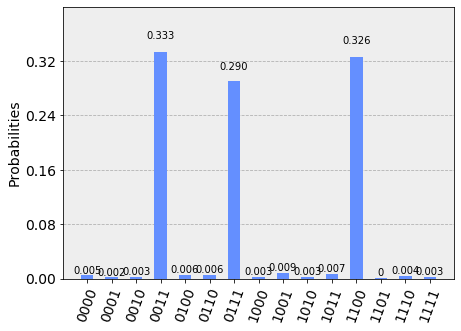

In [9]:
plot_histogram(result['measurement'])

#### Now it's your turn to play!

Create and implement the scenario described below, modeled as a boolean satisfiability problem using Grover search. 

#### Card finding problem

As an example, we want to find the card which satisfy a serie of conditions which worth 0 or 1.

We have a set of 32 cards, whose colors are $spade$, $club$, $diamond$ and $heart$. 
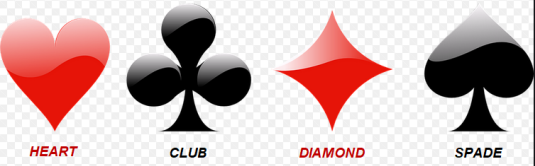


As in the $belote$ game, these cards are $7$, $8$, $9$, $10$, $J$, $Q$, $K$, $A$. 
Since we want to find a way to describe these cards with (simple) logical operators, we decide of additionnal properties to caracterize them. 
* First, the parity of the card, starting with the 7 (odd) up to the ace (even).
* Second, the value of the card if it was a trump suit card (which, in belote, can be separated between low values (7, 8, Q, K) and high values (10, A, 9, J)).
* It can seem far-stretched (because it is), but this facilitates the mapping, making explanations clearer. 

We thus have a way to describe any card with boolean caracteristics:
* $x_0$: is the card black ?
* $x_1$: is it either a club or a heart ? (depending on $x_0$)
* $x_2$: is its symbol a letter ? (ie J, Q, K, A)
* $x_3$: is its value high ? (ie 10, A, 9, J)
* $x_4$: is it odd ?

If we take as an example the $Queen$ $of$ $hearts$, it will be encoded with $x_0 = 0$ (red), $x_1 = 1$ (heart), $x_2 = 1$ (letter), $x_3 = 0$ (low value) and $x_4 = 0$ (even), thus $00110$.

#### Now create the logical expression to find the Queen of Hearts

In [4]:
expression='( ~x0 & x1 & x2 & ~x3 & ~x4 )'

In [5]:
Oracle=LogicalExpressionOracle(expression, mct_mode='noancilla', optimization=True)

#### Qiskit provides a method to draw the Oracle associated circuit : .circuit.draw() 
Use this method to draw the circuit associated with the Oracle you created 

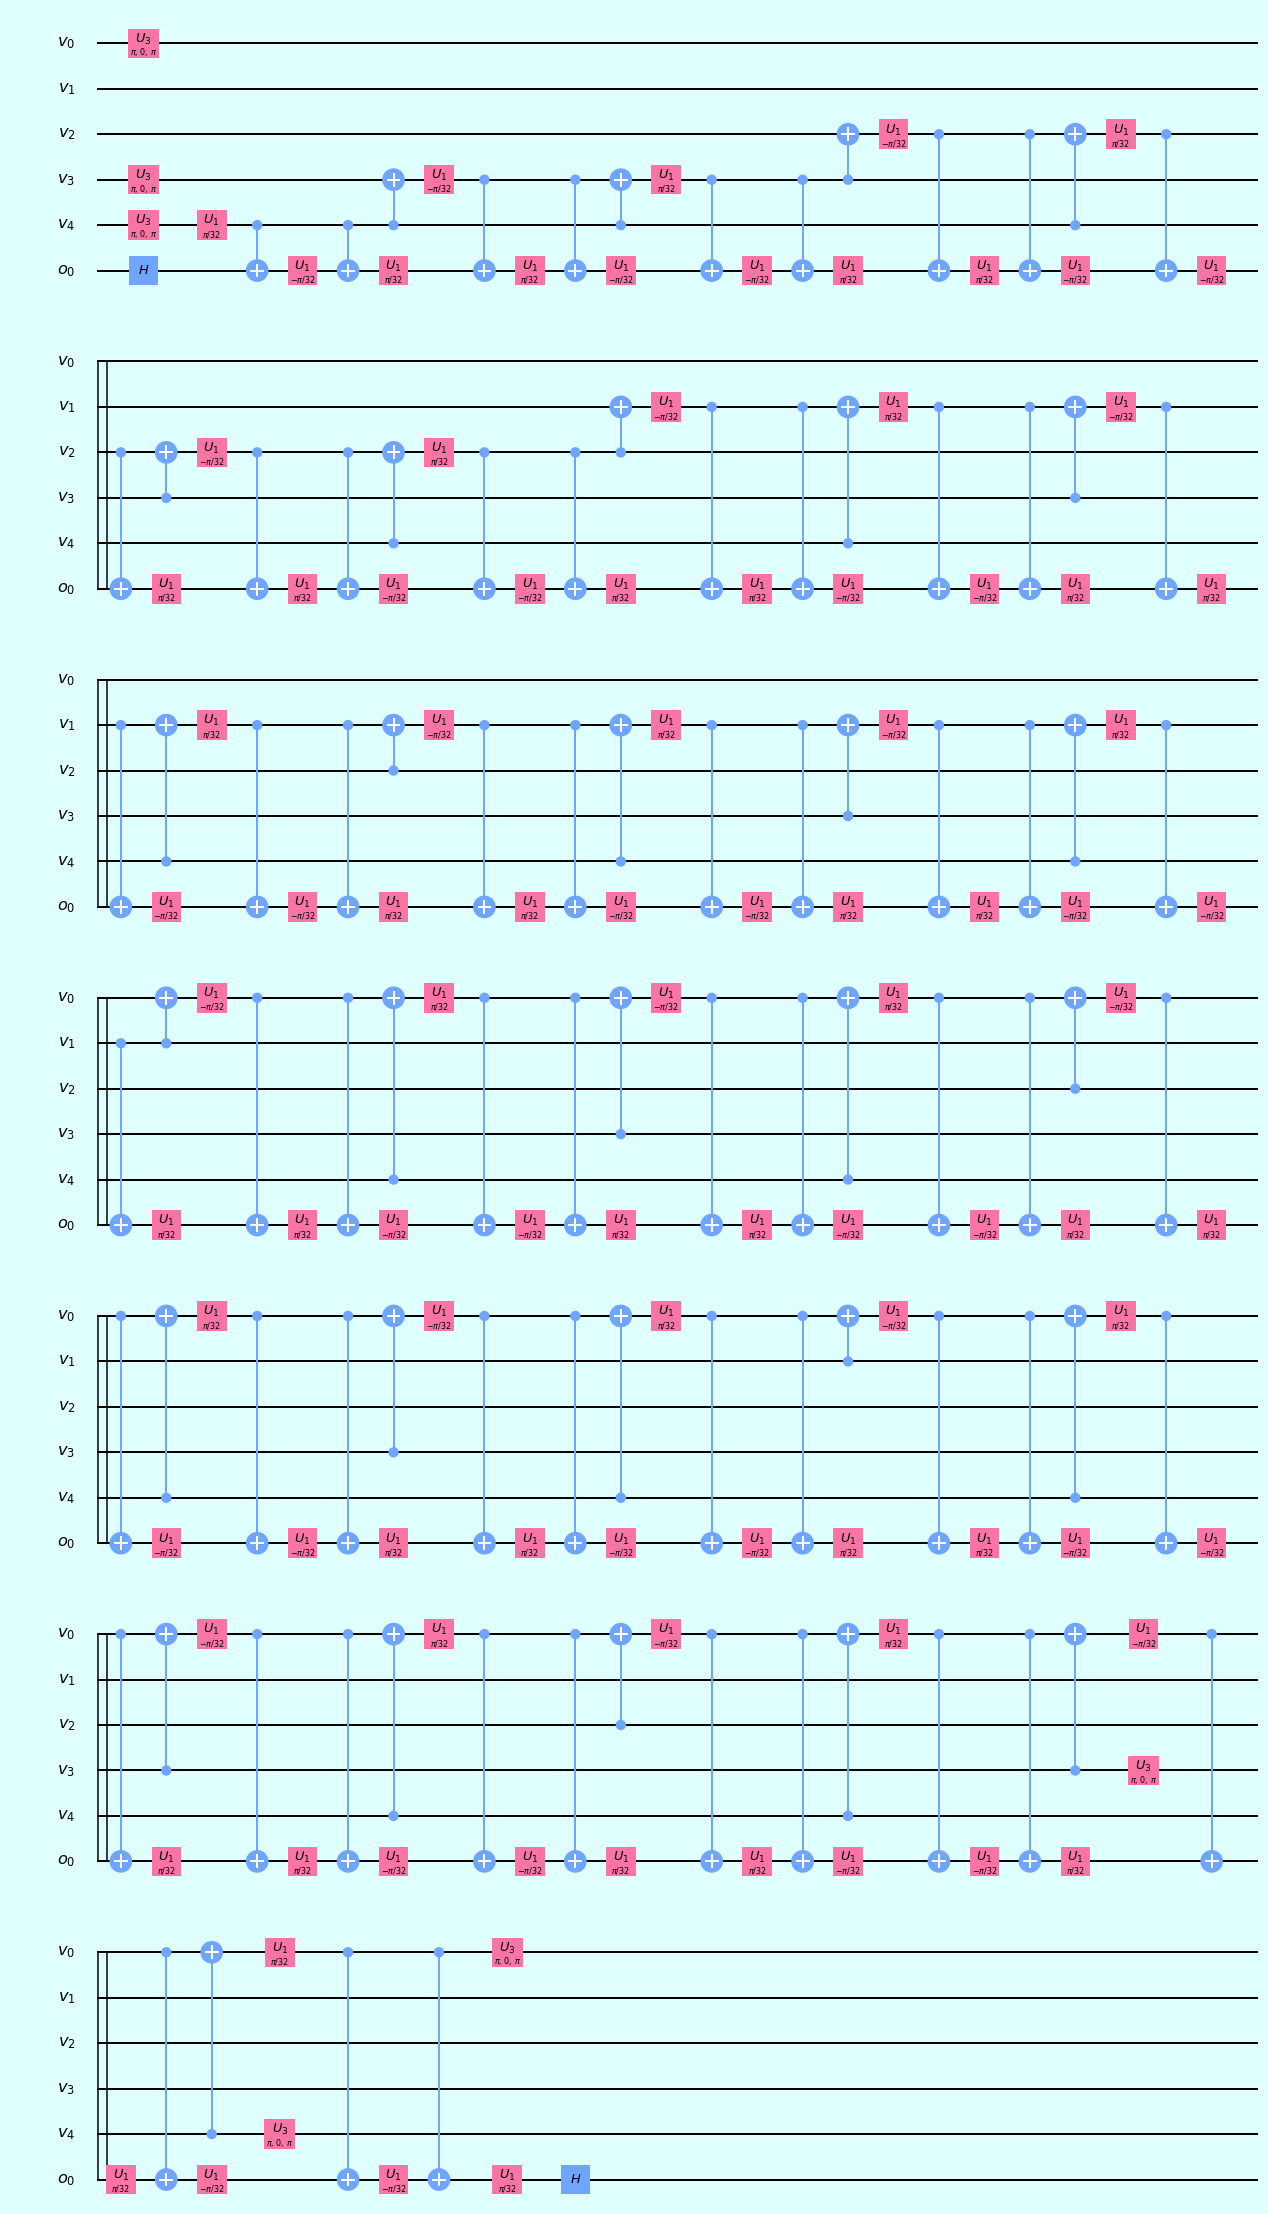

In [6]:
# Use the method .circuit.draw() to the Oracle to draw the associated circuit
style = {'backgroundcolor': 'lightcyan'}
Oracle.circuit.draw(output='mpl', style=style)

#### Now, invoke the Grover algorithm provided by Aqua using the Oracle you created previously 

In [7]:
# invoke Grover algorythm using the Oracle
algorithm = Grover(Oracle)

# execute Grover Algorithm
result = algorithm.run(backend)

This is the number of circuits :  266


In [8]:
# plot the histogram of the measurents 
# print the top measurement results 
print('The maximum amplitude is :',result['top_measurement'],',', convert_to_card(result['top_measurement']))

print_image(result['top_measurement'])

plot_histogram(result['measurement'])


The maximum amplitude is : 00110 , Queen of hearts


#### By default Grover iterations is set to 1. With 32 cards, what would be the optimal number of Grover iterations for having amplitudes to 0 for all of the other values than the one we are looking for?  
The optimum number of iterations that we'll call $m$ is directly linked to the number of Qubits of the circuit, and is 
$$m = \frac{\pi}{4}\sqrt{2^{N}}$$  with $N$ beeing the number of Qubits

This is the number of circuits :  774
The answer is : 00110 , Queen of hearts


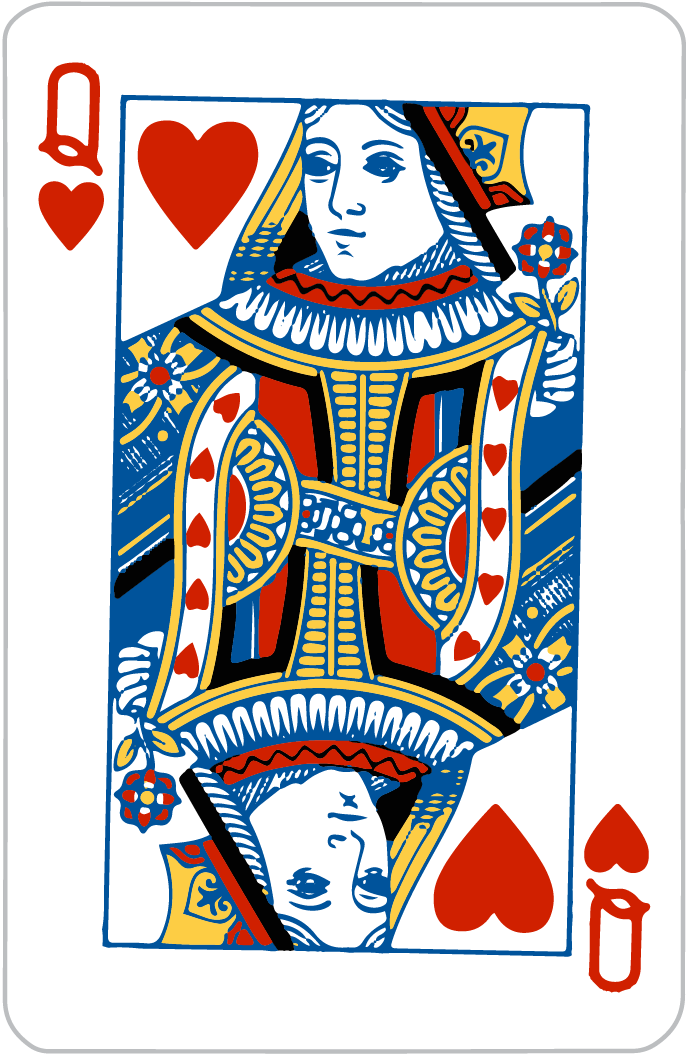

In [9]:
# invoke Grover algorythm using the Oracle and the number of iterations you define previously
# Let's try with 3 
algorithm =Grover(Oracle, num_iterations=3)

# execute Grover Algorithm
result = algorithm.run(backend)
print('The answer is :',result['top_measurement'],',', convert_to_card(result['top_measurement']))

# plot histogram
print_image(result['top_measurement'])
plot_histogram(result['measurement'])

This is the number of circuits :  1028
The answer is : 00110 , Queen of hearts


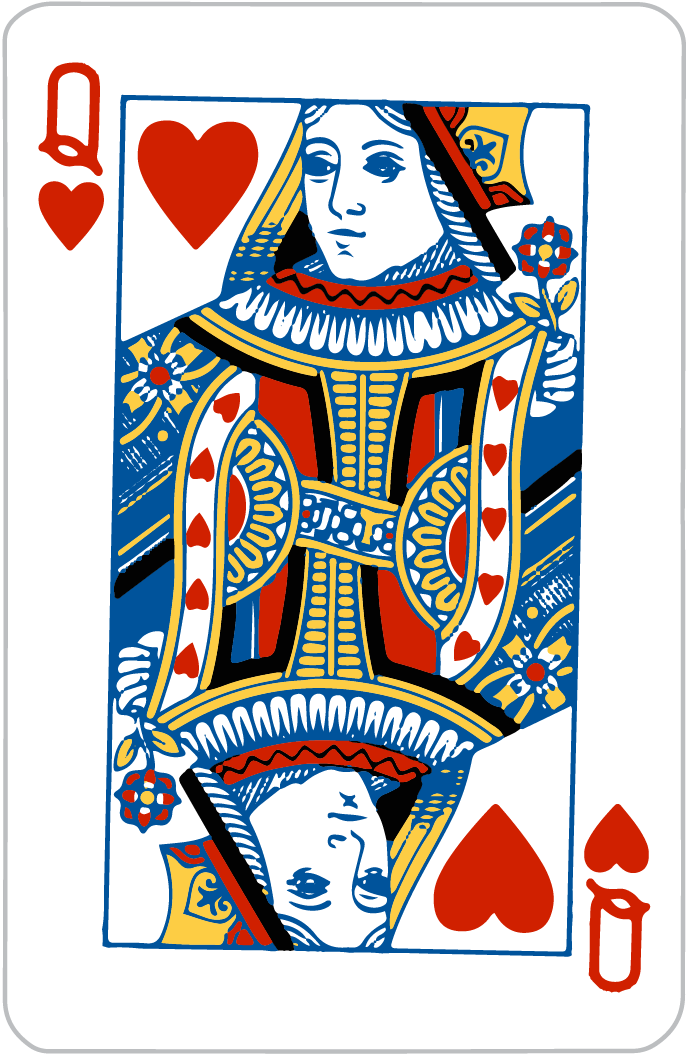

In [10]:
# invoke Grover algorythm using the Oracle and the number of iterations you define previously
# Let's try with 4 iterations 
algorithm =Grover(Oracle, num_iterations=4)

# execute Grover Algorithm
result = algorithm.run(backend)
print('The answer is :',result['top_measurement'],',', convert_to_card(result['top_measurement']))

# plot histogram
print_image(result['top_measurement'])
plot_histogram(result['measurement'])

### Using Real Backend "IBMQ Almaden" 20 Qubits system 

In [36]:
# Grover search 3 iterations 
from qiskit import IBMQ
IBMQ.load_account()
provider=IBMQ.get_provider(hub='ibm-q-internal', group='support', project='core-team')

backend=provider.get_backend('ibmq_almaden')

# invoke Grover algorythm using the Oracle and the number of iterations you define previously
algorithm = Grover(Oracle, num_iterations=3)

# execute Grover Algorithm
result_3iter = algorithm.run(backend)
print('The answer is :',result_3iter['top_measurement'],',', convert_to_card(result_3iter['top_measurement']))

# plot histogram
print_image(result_3iter['top_measurement'])
plot_histogram(result_3iter['measurement'])

The skip Qobj validation does not work for IBMQ provider. Disable it.


The answer is : 00001 , 8 of spades


In [34]:
# Let's print out the overall circuit Oracle+Grover
Grover_circuit = algorithm.construct_circuit()
Grover_circuit.draw(style=style)

The skip Qobj validation does not work for IBMQ provider. Disable it.


The answer is : 00010 , 8 of hearts


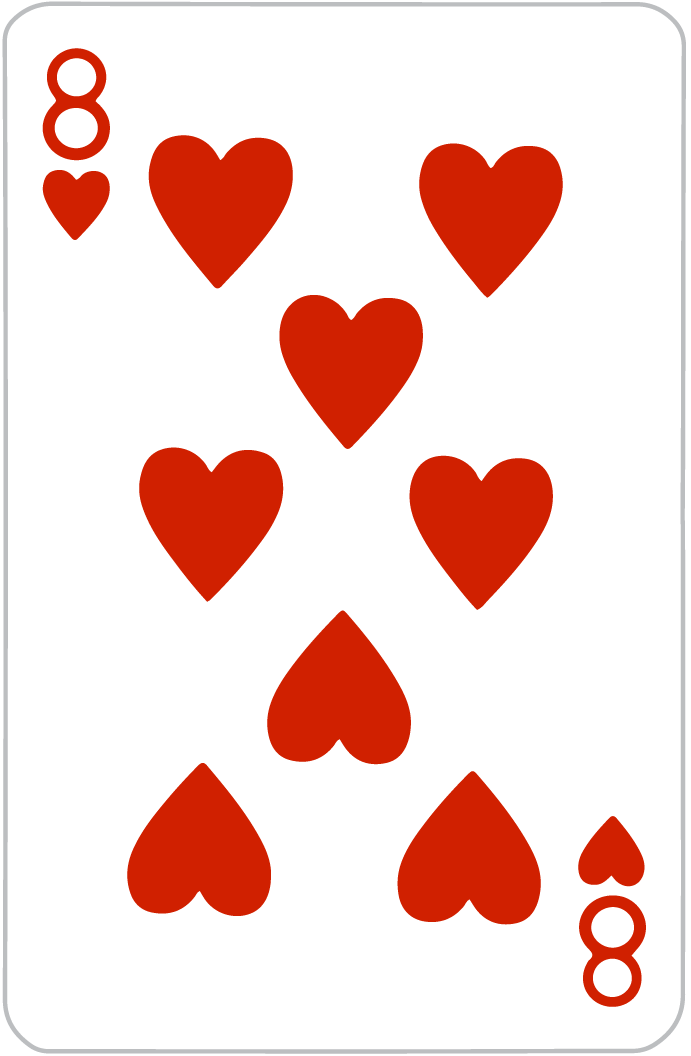

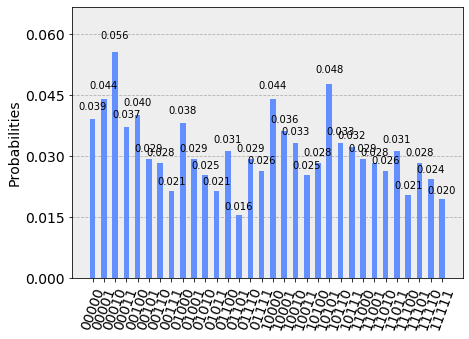

In [35]:
# Grover search 2 iterations 

from qiskit import IBMQ
IBMQ.load_account()
# provider=IBMQ.get_provider(hub='ibm-q-internal', group='support', project='core-team')

#backend=provider.get_backend('ibmq_boeblingen')
providerPrivate = IBMQ.get_provider(hub='ibm-q-internal', group='support', project='core-team')

backend=providerPrivate.get_backend('ibmq_almaden')

# invoke Grover algorythm using the Oracle and the number of iterations you define previously
algorithm =Grover(Oracle, num_iterations=2)

# execute Grover Algorithm
result_iter2 = algorithm.run(backend)
print('The answer is :',result_iter2['top_measurement'],',', convert_to_card(result_iter2['top_measurement']))

# plot histogram
print_image(result_iter2['top_measurement'])
plot_histogram(result_iter2['measurement'])

The skip Qobj validation does not work for IBMQ provider. Disable it.


The answer is : 00001 , 8 of spades


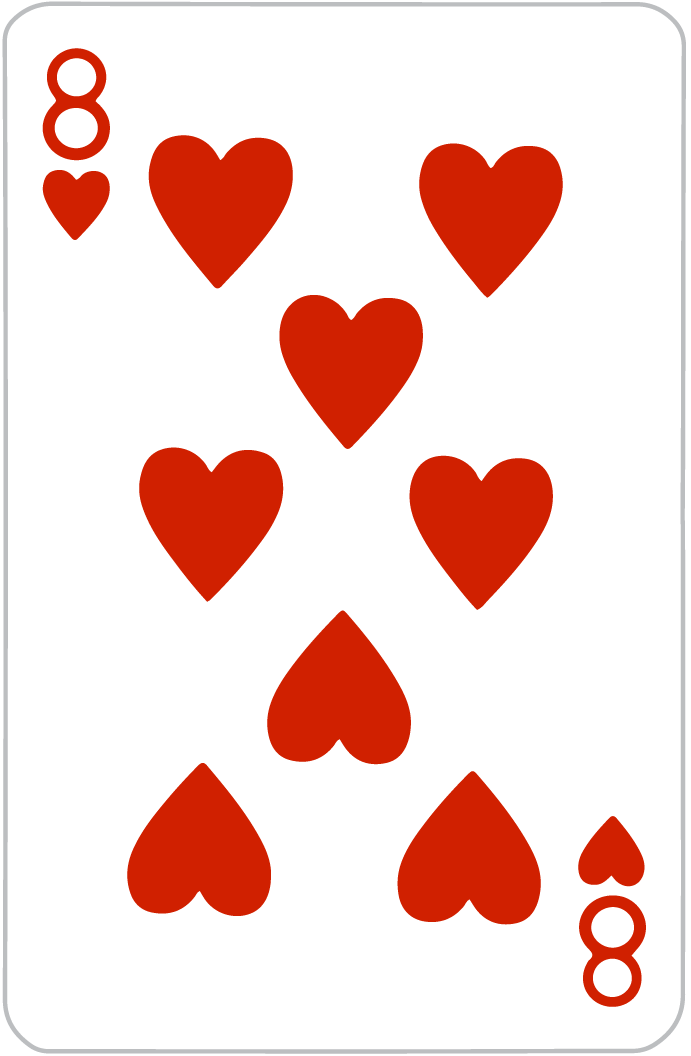

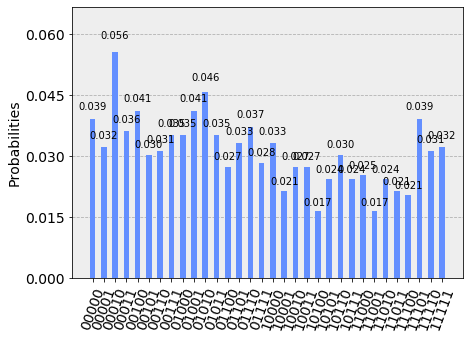

In [17]:
# Grover search 1 iterations 

from qiskit import IBMQ
IBMQ.load_account()
# provider=IBMQ.get_provider(hub='ibm-q-internal', group='support', project='core-team')

#backend=provider.get_backend('ibmq_boeblingen')
providerPrivate = IBMQ.get_provider(hub='ibm-q-internal', group='support', project='core-team')

backend=providerPrivate.get_backend('ibmq_almaden')

# invoke Grover algorythm using the Oracle and the number of iterations you define previously
algorithm =Grover(Oracle, num_iterations=1)

# execute Grover Algorithm
result_1iter = algorithm.run(backend)
print('The answer is :',result['top_measurement'],',', convert_to_card(result['top_measurement']))

# plot histogram
print_image(result_1iter['top_measurement'])
plot_histogram(result_1iter['measurement'])

The skip Qobj validation does not work for IBMQ provider. Disable it.


11710
The answer is : 11010 , 9 of hearts


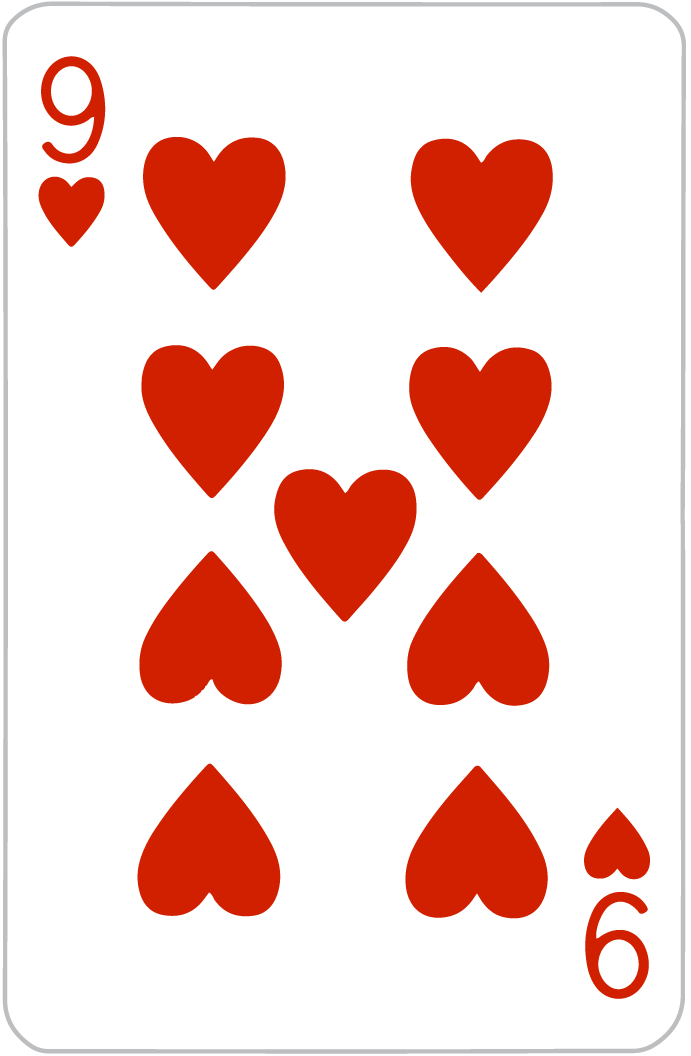

In [56]:
# Grover search 5 iterations

from qiskit import IBMQ
IBMQ.load_account()
# provider=IBMQ.get_provider(hub='ibm-q-internal', group='support', project='core-team')

#backend=provider.get_backend('ibmq_boeblingen')
providerPrivate = IBMQ.get_provider(hub='ibm-q-internal', group='support', project='core-team')

backend=providerPrivate.get_backend('ibmq_almaden')

jobn = 1
training_size = 20
testing_size = 20
shots = 1024
uin_depth = 1
uvar_depth = 1
niter = 100
backend_name = 'ibmq_rochester'
option = 'def_run1'
random_seed = 10598+1010*uin_depth+101*uvar_depth+jobn
print(random_seed)
quantum_instance = QuantumInstance(backend, shots=4096, seed_simulator=random_seed, initial_layout=[1,2,3,4,5,6,7,8,9] ,optimization_level = 2, measurement_error_mitigation_cls=CompleteMeasFitter, measurement_error_mitigation_shots=4096, seed_transpiler=random_seed, skip_qobj_validation=True)

# invoke Grover algorythm using the Oracle and the number of iterations you define previously
algorithm = Grover(Oracle, num_iterations=5)

# execute Grover Algorithm
# result_5iter = algorithm.run(backend)
result_5iter = algorithm.run(quantum_instance)
print('The answer is :',result_5iter['top_measurement'],',', convert_to_card(result_5iter['top_measurement']))

# plot histogram
print_image(result_5iter['top_measurement'])
plot_histogram(result_5iter['measurement'])

In [57]:
backend=providerPrivate.get_backend('ibmq_almaden')
backend.properties()

BackendProperties(backend_name='ibmq_almaden', backend_version='1.3.0', gates=[Gate(gate='id', name='id_0', parameters=[Nduv(date=datetime.datetime(2019, 12, 5, 7, 27, 33, tzinfo=datetime.timezone.utc), name='gate_error', unit='', value=0.00034459226048533324), Nduv(date=datetime.datetime(2019, 12, 5, 13, 32, 9, tzinfo=datetime.timezone.utc), name='gate_length', unit='ns', value=35.55555555555556)], qubits=[0]), Gate(gate='u1', name='u1_0', parameters=[Nduv(date=datetime.datetime(2019, 12, 5, 7, 27, 33, tzinfo=datetime.timezone.utc), name='gate_error', unit='', value=0.0), Nduv(date=datetime.datetime(2019, 12, 5, 13, 32, 9, tzinfo=datetime.timezone.utc), name='gate_length', unit='ns', value=0.0)], qubits=[0]), Gate(gate='u2', name='u2_0', parameters=[Nduv(date=datetime.datetime(2019, 12, 5, 7, 27, 33, tzinfo=datetime.timezone.utc), name='gate_error', unit='', value=0.00034459226048533324), Nduv(date=datetime.datetime(2019, 12, 5, 13, 32, 9, tzinfo=datetime.timezone.utc), name='gate_len

In [32]:
print(Oracle.circuit.qregs[0])
print(Oracle.circuit.qregs[1])
print(Oracle.circuit.qregs[2])


QuantumRegister(5, 'v')
QuantumRegister(1, 'o')


IndexError: list index out of range

In [22]:
# Let's draw the full circuit 
algorithm =Grover(Oracle, num_iterations=1)
# algorithm.construct_circuit(False)
total_circuit=algorithm.construct_circuit(False)
print(total_circuit.qregs[0])
total_circuit.draw(output='mpl')

QuantumRegister(5, 'v')


ValueError: 

^
Double subscript  (at char 0), (line:1, col:1)

<Figure size 1683.19x5381.88 with 1 Axes>

#### Let's take into account the noise. The presence or errors in the quantum computing.  understand and mitigate the errors using ignis.  Energy relaxation !!!!  measurement error mitigation

In [23]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter) 

In [20]:
# using the "total_circuit"
cal_circuits, state_labels = complete_meas_cal(qr = total_circuit.qregs[0], circlabel = 'measerrormitigationcal')

NameError: name 'total_circuit' is not defined

In [41]:
# using the "Oracle circuit only"
cal_circuits, state_labels = complete_meas_cal(qr = Oracle.circuit.qregs[0], circlabel = 'measerrormitigationcal')

In [18]:
cal_circuits[2].draw(output='mpl')

NameError: name 'cal_circuits' is not defined

In [71]:
len(cal_circuits)
# 32 circuits expected as we use 5 qubits

32

In [72]:
from qiskit import execute
from qiskit.tools.monitor import job_monitor 
cal_job = execute(cal_circuits, 
                  backend = backend,
                  shots = 1024,
                  optimization_level = 0 
                  )
print(cal_job.job_id())
job_monitor(cal_job)
cal_results = cal_job.result()

5d9315c488178300127bcb10
Job Status: job has successfully run


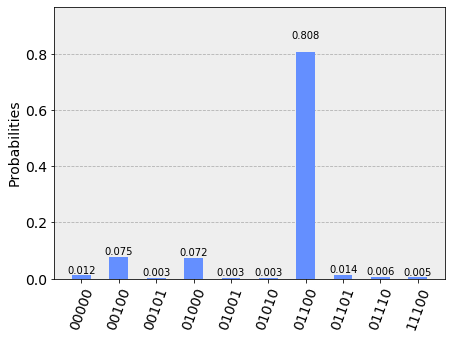

In [73]:
# for example we plot circuit12
plot_histogram(
cal_results.get_counts(cal_circuits[12]))

In [74]:
meas_fitter = CompleteMeasFitter(cal_results, state_labels)

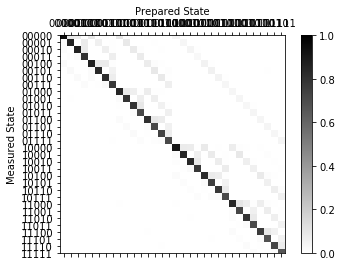

In [75]:
meas_fitter.plot_calibration()

In [76]:
meas_filter = meas_fitter.filter
# plot_histogram(result['measurement'])
# print(result)

In [91]:
mitigated_result = meas_filter.apply(result_iter2['measurement'])
print (mitigated_result)
# print (list(mitigated_result))


{'00000': 41.22613066072429, '00001': 43.61224529112932, '00010': 44.959624737711074, '00011': 35.54456204696692, '00100': 35.43939085793727, '00101': 39.57096027493436, '00110': 39.16635856117592, '00111': 43.84152870517866, '01000': 29.86413246231025, '01001': 28.28258869634563, '01010': 31.124180942918183, '01011': 23.01280062045311, '01100': 22.871730893047243, '01101': 37.88216556705363, '01110': 18.781807107621617, '01111': 41.72483459039779, '10000': 27.05932230953764, '10001': 22.42795046616716, '10010': 24.393764130222863, '10011': 53.6690817131123, '10100': 33.44055726133358, '10101': 29.3746744169543, '10110': 36.48746921795673, '10111': 22.79291180533888, '11000': 21.063965544086404, '11001': 30.510031289404548, '11010': 34.19659928761893, '11011': 7.726699109133506, '11100': 33.15396886535154, '11101': 38.84063918643051, '11110': 21.590249986140616, '11111': 30.367073395305418}


10011


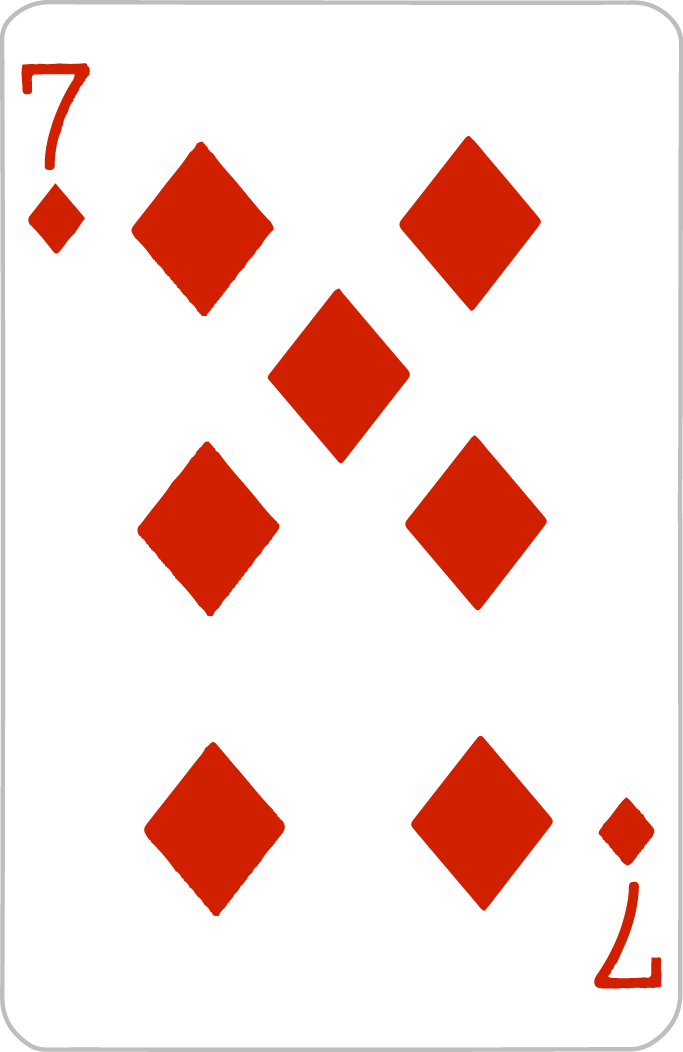

In [94]:
# max_key = max(stats, key=lambda k: stats[k])
mitigated_value = max(mitigated_result, key=mitigated_result.get)
print(mitigated_value)
print_image(mitigated_value)

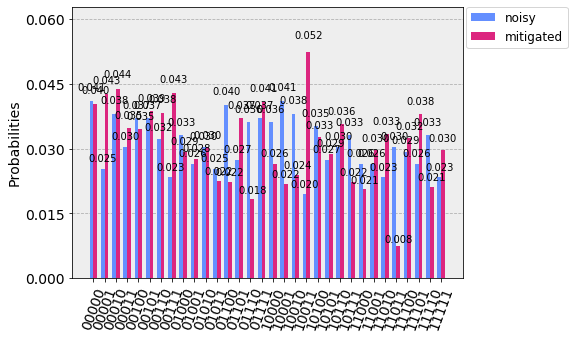

In [93]:
# device_counts = result.get_counts(circ)
# mitigated_counts = mitigated_result.get_counts(circ)
plot_histogram([result['measurement'], mitigated_result], legend=['noisy', 'mitigated'])